In [1]:
# Sorting arrays
# insertion sorts, selection sorts, merge sorts, quick sorts, and # bubble sorts 

import numpy as np

def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x




In [2]:
x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

In [3]:
# Good for simplicity but too slow for larger arrays
# for list of N values, it requires N loops each of which does on the order of ~N
# comparisons to find the swap value
# if you double the number of items on the list the execution time will go up by a factor of four

# bogosort
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(X)
    return x

In [5]:
X = np.array([2, 1, 4, 3, 5])
bogosort(X)

array([1, 2, 3, 4, 5])

In [6]:
# This uses a random shuffling of the array until the results happen to be sorted
# The average scaling of [NxN], this should never be used in real sorting

# Fast sorting with np.sort and np.argsort
# by default np.sort uses O[N log N], quick sort algorithm

X = np.array([2,1,4,3,5])
np.sort(X)

array([1, 2, 3, 4, 5])

In [7]:
# to sort the array in-place, you can use the sort method of arrays
X.sort()
print(X)

[1 2 3 4 5]


In [8]:
# argsort, returns the indices of the sorted elements
X = np.array([2,1,4,3,5])
i = np.argsort(X)
print(i)

[1 0 3 2 4]


In [9]:
# The first element gives the index of the smallest element, the second value gives the index of # the second smallest and so on 
# These indices can be used (via fancy indexing)

X[i]

array([1, 2, 3, 4, 5])

In [10]:
# Sorting along rows or columns
rand = np.random.RandomState(42)
x = rand.randint(0, 10, (4, 6))
print(x)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [11]:
# Sort each columns of x
np.sort(x, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [12]:
# Sort each row of X
np.sort(x, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

In [13]:
# This treats each row or column as an independent array, and any relationship between
# rows and columns will be lost

# Partial Sorts: Partitioning
# Sometimes we're not interested in sorting the entire array, but want to find the K smallest
# values in the array. Numpy provides this in the np.partition function
# np.partition takes an array and a number K; the result is a new array with the smallest K 
# values on the left of the partition
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [16]:
X = rand.randint(0, 10, (4, 6))

In [18]:
np.partition(X, 2, axis=1)

array([[0, 2, 3, 8, 6, 9],
       [2, 2, 4, 8, 6, 4],
       [1, 1, 3, 8, 8, 6],
       [1, 3, 4, 9, 9, 8]])

In [20]:
# the result is an array where the first two slots in each row contain the smallest values
# from that row, with the remaining values filling the remaining slots

# Finally, just as there is an np.sort that computes indicies of the sort, there is a np.        # argpartition that computes indices of the partition

In [21]:
# Example: k-Nearest Neighbors
# Let's quickly see how we might use this argsort function along multiple axes to find the
# nearest neighbors of each point in a set of 10 points in a two-dimensional plane in a 
# 10x2 array

X = rand.rand(10, 2)

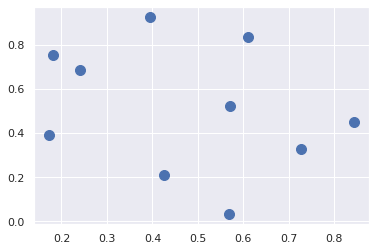

In [22]:
# To get an idea of how these points look we can use a scatter plot
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # plot styling
plt.scatter(X[:, 0], X[:, 1], s=100)

In [23]:
# Now we'll compute the distance between each pair of points
# The squared distance between two points is the sum of the squared differences in each dimension
# suing the effecient broadcasting and aggregation provided by numpy, we can compute
# the matrix of square distances in a single line of code: 

dist_sq = np.sum((X[:, np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=1)

In [24]:
# for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [25]:
# square the coordinate differences
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [26]:
# sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [27]:
# Just to double-check what we are doing, we should see that the diagonal of this matrix
# (i.e, the set distances between each point and itself) is all zero:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
# with the pairwise square-distances converted, we can now use np.argsort to sort along each row
# The leftmost columns will then give the indices of the nearest neighbors:

nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 7 2 9 1 4 8 6 5]
 [1 7 9 0 3 6 8 2 4 5]
 [2 0 4 3 9 5 8 7 1 6]
 [3 0 7 2 1 9 4 8 6 5]
 [4 5 2 8 9 6 0 3 1 7]
 [5 4 8 9 6 2 0 1 3 7]
 [6 8 9 1 4 5 0 7 2 3]
 [7 1 3 0 9 2 6 8 4 5]
 [8 6 9 4 5 1 2 0 7 3]
 [9 8 6 1 4 0 2 7 3 5]]


In [29]:
# have to fix this
dist_sq = np.sum((X[:, np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=-1)

In [30]:
# with the pairwise square-distances converted, we can now use np.argsort to sort along each row
# The leftmost columns will then give the indices of the nearest neighbors:

nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 7 2 9 1 4 8 6 5]
 [1 7 9 0 3 6 8 2 4 5]
 [2 0 4 3 9 5 8 7 1 6]
 [3 0 7 2 1 9 4 8 6 5]
 [4 5 2 8 9 6 0 3 1 7]
 [5 4 8 9 6 2 0 1 3 7]
 [6 8 9 1 4 5 0 7 2 3]
 [7 1 3 0 9 2 6 8 4 5]
 [8 6 9 4 5 1 2 0 7 3]
 [9 8 6 1 4 0 2 7 3 5]]


In [31]:
# Notice that the first comlumn gives the numbers through 9 in order:
# this is due to the fact that each points closest neighbors is itself, as we would expect

# Using fullsort is doing more work than necessary in this case
# If trying to get the nearest k neighbors all we need is to partition each row so that the 
# smalles k + 1 squared distance comes first, with larger distances filling the remaining 
# position in the array. We can use the np.argpartition function
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

NameError: name 'k' is not defined

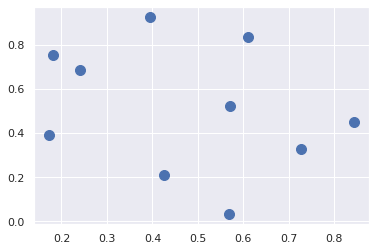

In [32]:
# Plot points along with lines representing the connection from each point to its two nearest 
# neighbors

plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :k+1]:
        # plot a line from X[i] to x[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')

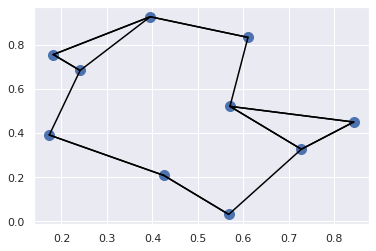

In [33]:
# Plot points along with lines representing the connection from each point to its two nearest 
# neighbors

plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to x[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')

In [34]:
# Each plot has lines drawn to its nearest two neighbors
# Some of the points have more than two lines due to point A being one of the two nearest
# neighbors of point B, this doesn't imply that point B is one of the two nearest neighbors of 
# point A

# Broadcasting row-wise sorting of this approach might seem less straightforward
# thank writing a loop, but it is an effecient way of operating on this data in Python
# Manually looping through the data and sorting each of the neighbors indivually would
# almost certainly lead to a slower algorithm than the vectorized version used
# written this way we could easily comput neighbors among 100 or 1,000,000 points and the 
# code would look the same

# When doing very large nearest-neighbor searches there are tree-based or approximate algorithms 
# That can scale as [N log N] or [N ** 2] of the brute-force algorithm